# Regresión lineal

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets, linear_model #datasets y modelos de aprendizaje automático (ML)
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from scipy import stats #para poder hacer cálculos científicos --> valores p
import statsmodels.api as sm

## Preparación de los datos

Vamos a cargar en un **dataframe** de ***pandas*** el datset "ResidentialBuiliding" que se encuentra en un archivo EXCEL.

In [2]:
data = pd.read_excel("03_ResidentialBuilding.xlsx")

In [3]:
print(data.shape)
data.head()

(372, 8)


,zipcode,total_floor_area,lot_area,total_cost_preliminary_estimation,duration_construction,price_unit_begining_project,total_population,actual_construction_cost
0,1,3150.0,920.0,598.5,16,1200,41407.0,410
1,1,7600.0,1140.0,3040.0,23,2900,44835.0,1000
2,1,4800.0,840.0,480.0,15,630,37933.0,170
3,1,685.0,202.0,13.7,4,140,8194.0,30
4,1,3000.0,800.0,1230.0,13,5000,48260.0,700


Hay 372 registros con 8 variables.
Vamos a analizar si hay problemas de datos con respecto a valores faltantes y outliers

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
zipcode,372.0,9.728495,6.563309,1.0,4.0,8.00,17.00,20.0
total_floor_area,372.0,1729.044355,1802.371491,200.0,720.0,1220.00,2100.00,15670.0
lot_area,372.0,426.114247,490.076498,60.0,190.0,300.00,490.50,5000.0
total_cost_preliminary_estimation,372.0,327.904086,563.544337,3.7,67.8,164.70,366.05,7208.2
duration_construction,372.0,6.266129,2.096495,2.0,5.0,6.00,7.00,23.0
price_unit_begining_project,372.0,1088.118280,995.826172,40.0,440.0,805.00,1300.00,5700.0
total_population,372.0,27551.883065,13516.283345,8194.0,12065.0,25758.75,40234.00,49572.0
actual_construction_cost,372.0,232.647849,162.627656,20.0,110.0,190.00,330.00,1000.0


No hay problemas de valores faltantes.
Sin embargo, el zipcode se está considerando como un dato numérico, cuando en realidad es un dato categórico que utiliza una codificación numérica par diferenciar diferentes zonas de la ciudad.

In [5]:
data.zipcode = data.zipcode.astype(str)
data.columns
data.describe(include='all')

,zipcode,total_floor_area,lot_area,total_cost_preliminary_estimation,duration_construction,price_unit_begining_project,total_population,actual_construction_cost
count,372,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1729.044355,426.114247,327.904086,6.266129,1088.118280,27551.883065,232.647849
std,NaN,1802.371491,490.076498,563.544337,2.096495,995.826172,13516.283345,162.627656
min,NaN,200.000000,60.000000,3.700000,2.000000,40.000000,8194.000000,20.000000
25%,NaN,720.000000,190.000000,67.800000,5.000000,440.000000,12065.000000,110.000000
50%,NaN,1220.000000,300.000000,164.700000,6.000000,805.000000,25758.750000,190.000000
75%,NaN,2100.000000,490.500000,366.050000,7.000000,1300.000000,40234.000000,330.000000


Es necesario crear variables dummy para cada uno de sus 20 valores.

In [6]:
dummyCols=pd.get_dummies(data.zipcode)
dummyCols.head()

,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dummyCols=pd.get_dummies(data.zipcode)
del data['zipcode']

In [8]:
dummyCols.columns = 'zip_' + dummyCols.columns
dummyCols.columns

Index(['zip_1', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15',
       'zip_16', 'zip_17', 'zip_18', 'zip_19', 'zip_2', 'zip_20', 'zip_3',
       'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8', 'zip_9'],
      dtype='object')

In [9]:
data = data.join(dummyCols)

In [10]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
total_floor_area,372.0,1729.044355,1802.371491,200.0,720.0,1220.00,2100.00,15670.0
lot_area,372.0,426.114247,490.076498,60.0,190.0,300.00,490.50,5000.0
total_cost_preliminary_estimation,372.0,327.904086,563.544337,3.7,67.8,164.70,366.05,7208.2
duration_construction,372.0,6.266129,2.096495,2.0,5.0,6.00,7.00,23.0
price_unit_begining_project,372.0,1088.118280,995.826172,40.0,440.0,805.00,1300.00,5700.0
total_population,372.0,27551.883065,13516.283345,8194.0,12065.0,25758.75,40234.00,49572.0
actual_construction_cost,372.0,232.647849,162.627656,20.0,110.0,190.00,330.00,1000.0
zip_1,372.0,0.080645,0.272656,0.0,0.0,0.00,0.00,1.0
zip_10,372.0,0.018817,0.136062,0.0,0.0,0.00,0.00,1.0
zip_11,372.0,0.010753,0.103275,0.0,0.0,0.00,0.00,1.0


# Aprendizaje del modelo de regresión - Evaluación sobre el conjunto de datos de entrenamiento

Vamos a crear un modelo de regresión lineal que permita obtener *actual_construction_cost* a partir de algunas de las demás variables independientes del dataset.

In [11]:
indep_vars = data.columns
indep_vars = indep_vars.drop('actual_construction_cost')
dep_vars = ['actual_construction_cost']

In [12]:
indep_vars = list(indep_vars)
X = data[indep_vars]
y = data[dep_vars]

Tenemos un dataframe con los datos de las variables independientes y otro con los de la variables dependiente.

Vamos ahora a partir cada dataframe en 2 de manera aleatoria: 67% de los datos se utilizarán para aprender el modelo, y 33 para evaluarlo.

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(249, 26)
(249, 1)
(123, 26)
(123, 1)


Ya tenemos todos los datos preparados para lanzar el modelo de regresión lineal a partir de los datos de entrenamiento.
Lanzamos el método **fit** que se encarga de encontrar la mejor línea de ajuste, y consultamos los diferentes coeficientes encontrados para las variables independientes.

In [15]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Se estableció que se va a utilizar un modelo de regresión lineal, que por defecto incluye un coeficiente para la interceptación de la ordenada en el origen, y que normaliza los datos de las variables predictivas.

In [16]:
for var, coef in zip(indep_vars, np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

total_floor_area: -0.03478021807947818
lot_area: 0.03778165709311816
total_cost_preliminary_estimation: 0.19536838181363722
duration_construction: 15.723836871000296
price_unit_begining_project: 0.1031244251694558
total_population: 0.0005264628397030338
zip_1: -768343505577848.4
zip_10: -768343505577726.9
zip_11: -768343505577775.1
zip_12: -768343505577751.6
zip_13: -768343505577773.1
zip_14: -768343505577755.5
zip_15: -768343505577725.0
zip_16: -768343505577728.5
zip_17: -768343505577726.2
zip_18: -768343505577700.4
zip_19: -768343505577702.9
zip_2: -768343505577728.8
zip_20: -768343505577782.2
zip_3: -768343505577806.0
zip_4: -768343505577691.4
zip_5: -768343505577723.6
zip_6: -768343505577803.4
zip_7: -768343505577741.9
zip_8: -768343505577732.0
zip_9: -768343505577660.2
intercepción: 768343505577741.2


## Predicción

Vamos a predecir la variable dependiente ajustada según el modelo para los datos de entrenamiento y para los datos de test

In [17]:
train_y_pred = regr.predict(train_X)
test_y_pred = regr.predict(test_X)
print(train_y_pred.shape)
print(test_y_pred.shape)
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))

(249, 1)
(123, 1)
MSE (train): 4752.3402
MSE (test) : 7770.5506
R2  (train): 0.8135
R2  (test) : 0.7237


scikit-learn no ofrece el cálculo del R2 ajustado, por lo que lo calculamos a mano:

In [18]:
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.7917
R2 adj (test): 0.6488


El valor del R2 ajustado corrige el valor del R2 con respecto a la complejidad dada por el número de variables independientes utilizadas, y permite comparar modelos de diferente número de predictores.

## Análisis de los coeficientes 

In [19]:
indep_vars

['total_floor_area',
 'lot_area',
 'total_cost_preliminary_estimation',
 'duration_construction',
 'price_unit_begining_project',
 'total_population',
 'zip_1',
 'zip_10',
 'zip_11',
 'zip_12',
 'zip_13',
 'zip_14',
 'zip_15',
 'zip_16',
 'zip_17',
 'zip_18',
 'zip_19',
 'zip_2',
 'zip_20',
 'zip_3',
 'zip_4',
 'zip_5',
 'zip_6',
 'zip_7',
 'zip_8',
 'zip_9']

Para poder establecer la significancia de los coeficientes, es necesario realizar pruebas de hipótesis de los coeficientes de cada variable predictiva, comparándolos contra 0.

El problema es que **scikit-learn** no realiza estas pruebas, y no incluye muchas de las métricas (como el R2 ajustado), y hay que utilizar el package **statsmodel**.


In [20]:
train_X2 = sm.add_constant(train_X)
print(train_X2.head())

     const  total_floor_area  lot_area  total_cost_preliminary_estimation  \
31     1.0            3600.0     980.0                              612.0   
36     1.0            1160.0     260.0                              185.6   
158    1.0             900.0     150.0                               63.0   
183    1.0             470.0     120.0                               14.1   
168    1.0            1310.0     290.0                              104.8   

     duration_construction  price_unit_begining_project  total_population  \
31                       7                          250            8684.5   
36                       7                          990           42587.0   
158                      6                          210           17881.5   
183                      7                          330           35763.0   
168                      7                          480            9766.5   

     zip_1  zip_10  zip_11  ...    zip_19  zip_2  zip_20  zip_3  zip_4  zi

In [21]:
array_y = np.asarray(train_y)
array_y[:5]

array([[145],
       [230],
       [100],
       [ 90],
       [100]], dtype=int64)

In [22]:
modeloStats = sm.OLS(np.asarray(train_y), train_X2)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     38.92
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           2.13e-67
Time:                        11:36:19   Log-Likelihood:                -1407.4
No. Observations:                 249   AIC:                             2867.
Df Residuals:                     223   BIC:                             2958.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.3565     19.337     -0.122      0.903     -40.464      35.751
total_floor_area                     -0.0348      0.012     -2.875      0.004      -0.059      -0.011
lot_area                              0.0377      0.035      1.079      0.282      -0.031       0.106
total_cost_preliminary_estimation     0.1960      0.022      9.028      0.000       0.153       0.239
duration_construction                15.6574      2.549      6.141      0.000      10.633      20.682
price_unit_begining_project           0.1029      0.008     12.652      0.000       0.087       0.119
total_population                      0.0005      0.000      1.437      0.152      -0.000       0.001
zip_1                              -104.1327     23.467     -4.437      0.000    -150.378     -57.887
zip_10                               17.2546     29.239      0.590      0.556     -40.365      74.874
zip_11                              -29.6284     35.139     -0.843      0.400     -98.875      39.618
zip_12                               -7.7115     25.320     -0.305      0.761     -57.609      42.186
zip_13                              -29.4048     29.122     -1.010      0.314     -86.795      27.985
zip_14                              -11.9372     18.384     -0.649      0.517     -48.167      24.292
zip_15                               19.1199     22.763      0.840      0.402     -25.739      63.979
zip_16                               15.9710     31.992      0.499      0.618     -47.073      79.015
zip_17                               17.5636     19.727      0.890      0.374     -21.311      56.438
zip_18                               43.6412     18.961      2.302      0.022       6.275      81.007
zip_19                               41.1051     20.748      1.981      0.049       0.219      81.992
zip_2                                14.9013     16.914      0.881      0.379     -18.431      48.234
zip_20                              -38.2818     17.322     -2.210      0.028     -72.417      -4.147
zip_3                               -62.1602     21.214     -2.930      0.004    -103.966     -20.355
zip_4                                52.8084     15.879      3.326      0.001      21.517      84.100
zip_5                                19.9066     19.723      1.009      0.314     -18.961      58.775
zip_6                               -59.2352     20.489     -2.891      0.004     -99.613     -18.858
zip_7                                 2.1551     18.300      0.118      0.906     -33.908      38.218
zip_8                                11.9504     19.441      0.615      0.539     -26.361      50.261
zip_9                                83.7581     40.385      2.074      0.039       4.174     163.342
=======================

Encontramos que los parámetros de los zipcodes, solo el 1, 3, 4, 6, 9, 18, 19 y 20 son significativos, los demás no lo son, al igual que lot_area y total_population.

También podemos ver que puede que haya problemas de multicolinearidad, como lo establece la 2a advertencia. Vamos a analizar la correlación entre las variables incluidas en el modelo.

In [23]:
# Calculamos la matriz de correlaciones
corr = train_X.join(train_y).corr()
corr

,total_floor_area,lot_area,total_cost_preliminary_estimation,duration_construction,price_unit_begining_project,total_population,zip_1,zip_10,zip_11,zip_12,...,zip_2,zip_20,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9,actual_construction_cost
total_floor_area,1.000000,0.948429,0.722144,0.193487,0.219731,0.071885,0.319229,-0.105700,-0.044340,-0.059012,...,0.008653,0.215892,0.198181,-0.026008,0.066174,-0.023991,-0.017559,-0.110904,-0.040556,0.209861
lot_area,0.948429,1.000000,0.603434,0.098084,0.120408,0.057271,0.218629,-0.084763,-0.039532,-0.052355,...,0.002962,0.273944,0.110773,-0.006471,0.061870,-0.032053,-0.042275,-0.089133,-0.036868,0.116412
total_cost_preliminary_estimation,0.722144,0.603434,1.000000,0.329163,0.580818,0.182363,0.338237,-0.085070,-0.054421,-0.069976,...,-0.009085,0.076378,0.292905,0.042796,0.030349,-0.021069,-0.065038,-0.084757,-0.031735,0.677564
duration_construction,0.193487,0.098084,0.329163,1.000000,0.114313,0.146139,0.186898,0.010818,-0.021208,-0.008849,...,-0.090332,0.048104,0.013467,-0.098192,-0.171519,0.062792,0.018040,-0.024136,-0.001041,0.346966
price_unit_begining_project,0.219731,0.120408,0.580818,0.114313,1.000000,0.166649,0.464999,-0.083556,-0.037075,-0.106433,...,0.036377,-0.068130,0.248158,0.013312,-0.053943,0.096473,-0.074782,0.024638,-0.038587,0.758159
total_population,0.071885,0.057271,0.182363,0.146139,0.166649,1.000000,-0.034316,-0.109876,0.037477,-0.129815,...,-0.052923,-0.012004,0.093551,0.064363,-0.003487,0.004922,-0.030049,0.021665,-0.008170,0.261210
zip_1,0.319229,0.218629,0.338237,0.186898,0.464999,-0.034316,1.000000,-0.042536,-0.034588,-0.049319,...,-0.077802,-0.079998,-0.068536,-0.084271,-0.066071,-0.063533,-0.070935,-0.066071,-0.029893,0.232399
zip_10,-0.105700,-0.084763,-0.085070,0.010818,-0.083556,-0.109876,-0.042536,1.000000,-0.020078,-0.028629,...,-0.045163,-0.046438,-0.039784,-0.048918,-0.038353,-0.036880,-0.041177,-0.038353,-0.017353,-0.048643
zip_11,-0.044340,-0.039532,-0.054421,-0.021208,-0.037075,0.037477,-0.034588,-0.020078,1.000000,-0.023280,...,-0.036725,-0.037761,-0.032351,-0.039778,-0.031187,-0.029989,-0.033483,-0.031187,-0.014110,-0.063567
zip_12,-0.059012,-0.052355,-0.069976,-0.008849,-0.106433,-0.129815,-0.049319,-0.028629,-0.023280,1.000000,...,-0.052366,-0.053844,-0.046129,-0.056720,-0.044470,-0.042761,-0.047744,-0.044470,-0.020120,-0.097773


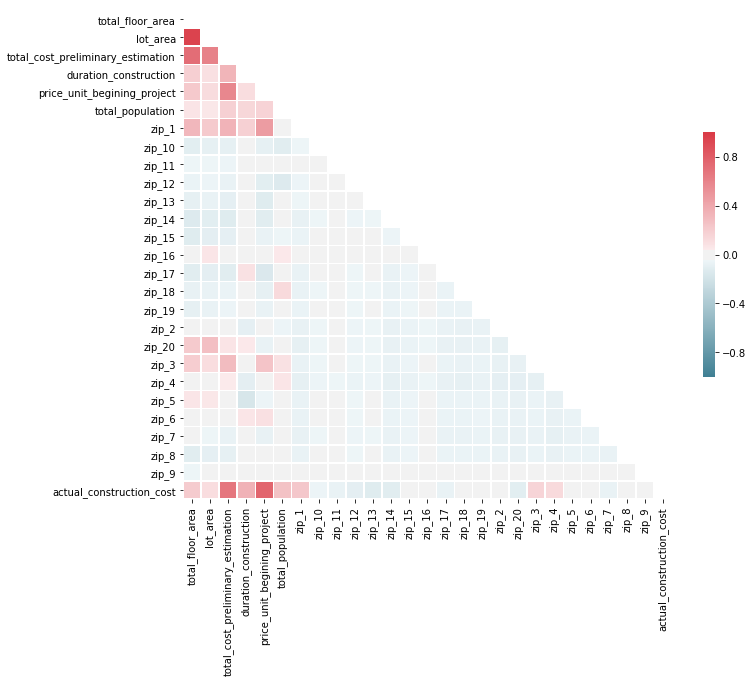

In [24]:
## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Borramos la parte diagonal superior con una máscara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Encontramos que *lot_are* está bastante correlacionada con *total_floor_area*. Vamos a  seguir un proceso de forward stepwise.

## Escogencia de variables

Empezamos por escoger como primera variable *total_cost_preliminary_estimation*, pues es la que tiene la correlación más importante con *actual_construction_cost*.

In [25]:
train_X2 = train_X[['price_unit_begining_project']]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
print(results.rsquared_adj)

0.5730843381513779


Partimos entonces de un R2 ajustado de 0.573.
Buscamos la siguiente mejor variable a agregar a *price_unit_begining_project*.

In [26]:
var_escogidas = ['price_unit_begining_project']
var_intentar = ['total_floor_area', 'lot_area', 'total_cost_preliminary_estimation', 'duration_construction', 
                'total_population', 'zip_1', 'zip_2', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
                'zip_9', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15', 'zip_16', 'zip_17',
                'zip_18', 'zip_19', 'zip_20']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.5733321743298702, 0.5719946005845187, 0.6569544073747955, 0.6405594631817955, 0.5902086846270551, 0.5899155704124422, 0.5713545648650085, 0.5722288576144884, 0.5864140852305494, 0.5714125202329056, 0.5798707053097305, 0.5714515158509832, 0.5713490088201882, 0.5749394111688001, 0.5715684711920006, 0.5726181198771527, 0.5716463694610224, 0.5724657551202431, 0.5719184986105097, 0.5718648395419765, 0.5713653613247052, 0.5730079938380179, 0.5779164694751634, 0.5756115965516038, 0.573882225322228]
['price_unit_begining_project', 'total_cost_preliminary_estimation']


Encontramos que el agregar *total_cost_preliminary_estimation* a *price_unit_begining_project* nos hace llegar el R2 ajustado a un valor de 0.657.

Buscamos la siguiente mejor variable a agregar.

In [27]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation']
var_intentar = ['total_floor_area', 'lot_area', 'duration_construction', 
                'total_population', 'zip_1', 'zip_2', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
                'zip_9', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15', 'zip_16', 'zip_17',
                'zip_18', 'zip_19', 'zip_20']


r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7251177329825829, 0.7056359347642795, 0.6872425118254586, 0.6669956534267971, 0.6827805743993776, 0.6556266643395912, 0.6630521231840729, 0.6677563658950265, 0.6557586014307151, 0.6597658409432777, 0.6555597377650806, 0.6568243338302341, 0.6595747089960333, 0.6563428406721333, 0.6561237766320234, 0.6557595149722225, 0.6562206382820874, 0.6555640000497468, 0.6573427214075918, 0.655709674613298, 0.6583385898036636, 0.6626853523198684, 0.6602762002565125, 0.664249280920948]
['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area']


Encontramos que el agregar *total_floor_area* a *total_cost_preliminary_estimation* y *price_unit_begining_project* nos hace llegar el R2 ajustado a un valor de 0.725.

Buscamos las siguiente variables a agregar hasta que encontramos que no se puede seguir mejorando el R2 ajustado.

In [28]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9',
                'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11']
var_intentar = ['zip_2', 'zip_5', 'zip_7', 'zip_8',
                'zip_10', 'zip_12', 'zip_15', 'zip_16', 'zip_17']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7978202765484377, 0.7979494243789943, 0.7981289633785842, 0.7977981569050812, 0.7978237371097138, 0.7983913930789173, 0.7978798202128143, 0.7978048908559534, 0.7978752193120044]
['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area', 'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9', 'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11', 'zip_12']


In [29]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9',
                'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11']
train_X2 = train_X[var_escogidas]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     actual_construction_cost   R-squared:                       0.812
Model:                                  OLS   Adj. R-squared:                  0.799
Method:                       Least Squares   F-statistic:                     58.87
Date:                      Sun, 23 Sep 2018   Prob (F-statistic):           6.43e-74
Time:                              11:36:20   Log-Likelihood:                -1408.1
No. Observations:                       249   AIC:                             2852.
Df Residuals:                           231   BIC:                             2915.
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                10.4295     19.544      0.534      0.594     -28.078      48.937
price_unit_begining_project           0.1029      0.008     13.167      0.000       0.087       0.118
total_cost_preliminary_estimation     0.1971      0.021      9.313      0.000       0.155       0.239
total_floor_area                     -0.0358      0.012     -3.108      0.002      -0.058      -0.013
duration_construction                15.5125      2.423      6.402      0.000      10.739      20.286
zip_1                              -116.2120     24.109     -4.820      0.000    -163.714     -68.710
zip_3                               -74.6942     22.238     -3.359      0.001    -118.510     -30.879
zip_6                               -71.6210     21.613     -3.314      0.001    -114.206     -29.036
zip_20                              -50.9658     18.413     -2.768      0.006     -87.245     -14.687
zip_4                                39.9374     17.134      2.331      0.021       6.179      73.696
zip_18                               30.9673     20.100      1.541      0.125      -8.635      70.569
zip_9                                71.2692     42.054      1.695      0.091     -11.589     154.128
zip_19                               28.5179     21.944      1.300      0.195     -14.719      71.754
total_population                      0.0006      0.000      1.553      0.122      -0.000       0.001
zip_13                              -41.8310     30.374     -1.377      0.170    -101.676      18.014
lot_area                              0.0404      0.033      1.213      0.226      -0.025       0.106
zip_14                              -24.4835     19.446     -1.259      0.209     -62.798      13.831
zip_11                              -42.2365     36.644     -1.153      0.250    -114.436      29.963
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.647
Skew:                           0.410   Prob(JB):                      0.00109
Kurtosis:                       3.802   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Encontramos que no todas son significativas, las últimas 9 variables que agregamos no tienen coeficientes significativos. Las eliminamos del modelo.

In [30]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4']
train_X2 = train_X[var_escogidas]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     actual_construction_cost   R-squared:                       0.799
Model:                                  OLS   Adj. R-squared:                  0.791
Method:                       Least Squares   F-statistic:                     105.3
Date:                      Sun, 23 Sep 2018   Prob (F-statistic):           5.50e-78
Time:                              11:36:20   Log-Likelihood:                -1417.0
No. Observations:                       249   AIC:                             2854.
Df Residuals:                           239   BIC:                             2889.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                23.5881     18.185      1.297      0.196     -12.236      59.412
price_unit_begining_project           0.1050      0.008     13.437      0.000       0.090       0.120
total_cost_preliminary_estimation     0.1960      0.021      9.360      0.000       0.155       0.237
total_floor_area                     -0.0231      0.005     -5.077      0.000      -0.032      -0.014
duration_construction                15.2789      2.401      6.363      0.000      10.549      20.009
zip_1                              -131.3638     23.564     -5.575      0.000    -177.783     -84.944
zip_3                               -83.9761     21.749     -3.861      0.000    -126.821     -41.132
zip_6                               -75.2883     21.688     -3.471      0.001    -118.013     -32.564
zip_20                              -50.0421     18.167     -2.755      0.006     -85.831     -14.254
zip_4                                40.1860     16.899      2.378      0.018       6.897      73.475
==============================================================================
Omnibus:                       14.230   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.204
Skew:                           0.540   Prob(JB):                     0.000499
Kurtosis:                       3.548   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Solo consideramos las 2 variables independientes escogidas

In [31]:
regr = linear_model.LinearRegression()
regr.fit(train_X[var_escogidas], train_y)
train_y_pred=regr.predict(train_X[var_escogidas])

## Análisis de los supuestos

### Linealidad de la relación entre variables independientes y variable dependiente

Solo consideramos las 2 variables independientes escogidas

In [32]:
regr = linear_model.LinearRegression()
regr.fit(train_X[var_escogidas], train_y)
train_y_pred=regr.predict(train_X[var_escogidas])

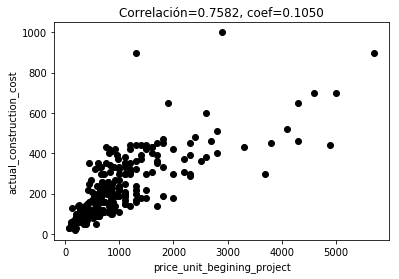

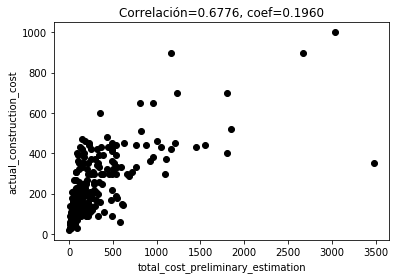

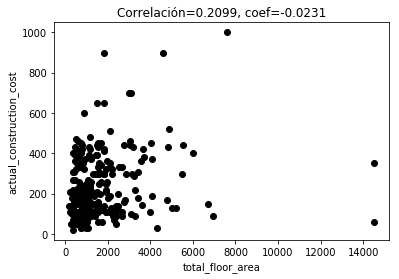

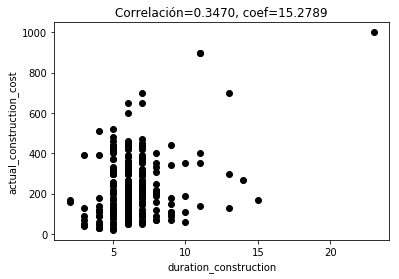

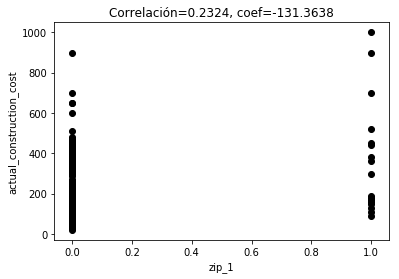

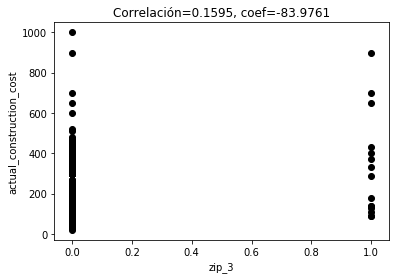

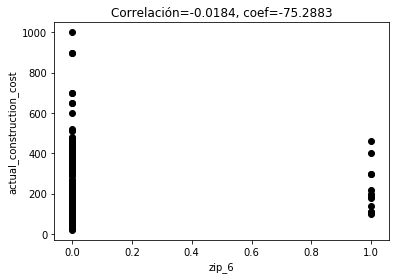

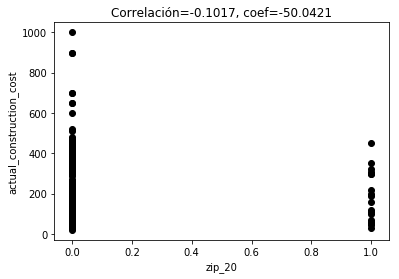

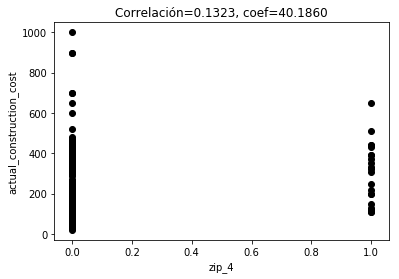

In [33]:
index = 0
for indep in var_escogidas:
    plt.scatter(train_X[indep], train_y,  color='black')
    plt.xlabel(indep)
    plt.ylabel("actual_construction_cost")
    plt.title("Correlación=%.4f, coef=%.4f" % (corr['actual_construction_cost'][indep_vars.index(indep)], 
                                               np.squeeze(regr.coef_)[index]))
    plt.show()
    index+=1

Vamos a plotear los residuos de las regresiones de los data sets.

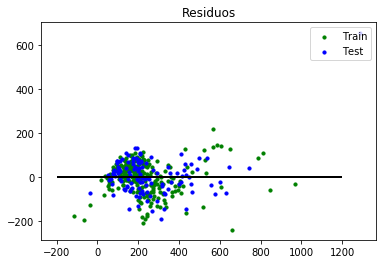

In [34]:
# Plot de los residuos del set de entrenamiento contra los valores ajustados
plt.scatter(train_y_pred, train_y_pred - train_y, color = "green", s = 10, label = 'Train')

# Plot de los residuos del set de evaluación contra los valores ajustados
plt.scatter(test_y_pred, test_y_pred - test_y, color = "blue", s = 10, label = 'Test')
 
# Ploteo de la linea de residuos nulos y=0
plt.hlines(y = 0, xmin = -200, xmax = 1200, linewidth = 2)
 
plt.legend(loc = 'upper right')
plt.title("Residuos")
plt.show()

No hay un patrón muy definido en cuanto a los residuos.

### Normalidad de los residuos

Volvemos a entrenar el modelo utilizando los 2 predictores escogidos, y calculamos los residuos

In [35]:
regr = linear_model.LinearRegression()
regr.fit(train_X[var_escogidas], train_y)
train_y_pred=regr.predict(train_X[var_escogidas])

In [36]:
residuos = np.array(train_y - train_y_pred)

Si aparecen FutureWarnings es por un problema de incompatibilidad entre scipy (<=1.1.0) y numpy (>=1.1.15), que se arreglará con la versión 1.2.0 de scipy:
https://stackoverflow.com/questions/51837727/scipy-binned-statistcs-future-warning

In [37]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5,1,'Densidad de probabilidad de los residuos')

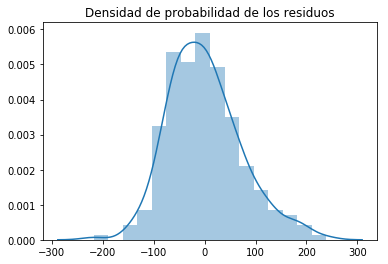

In [38]:
sns.distplot(residuos);
plt.title('Densidad de probabilidad de los residuos')

Los datos parecen ser simétricos, aunque están ligeramente estirados hacia la derecha. Vamos a ver cómo nos va con los tests (que son bastante rígidos al respecto).

In [39]:
from scipy.stats import mstats
normalidad = mstats.normaltest(residuos)
normalidad.pvalue

array([0.00081301])

Este test rechaza la hipótesis nula de normalidad.

Vamos ahora a realizar un QQ plot que permite no ser tan extremo en las conclusiones.

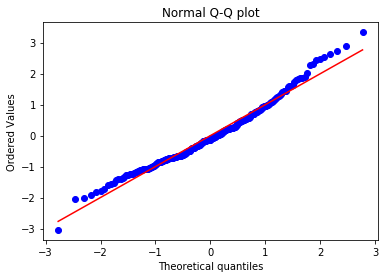

In [40]:
import scipy.stats as stats
z = (residuos-np.mean(residuos))/np.std(residuos)
z2=z.reshape(-1)
stats.probplot(z2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Encontramos que los puntos de los extremos están separados de la diagonal. Esto puede significar que los datos están un poco estirados (como se puede ver en el gráfico de densidad de probabilidad de los residuos), por lo que se podría buscar una transformación que los centre un poco más.

Sin embargo, los puntos están bastante cerca de la diagonal, por lo que se puede estar tránquilo al respecto

Podemos intentar con transformaciones de los datos

In [41]:
train_y_log = np.log10(np.array(train_y) + 1e1)
train_X_log = np.log10(np.array(train_X[var_escogidas]) + 1e1)

In [42]:
regr_logy = linear_model.LinearRegression()
regr_logy.fit(train_X[var_escogidas], train_y_log)
train_y_pred_logy=regr_logy.predict(train_X[var_escogidas])
normalidad = mstats.normaltest(train_y_pred_logy - train_y_log)
print(normalidad.pvalue)

regr_logX = linear_model.LinearRegression()
regr_logX.fit(train_X_log, train_y)
train_y_pred_logX=regr_logX.predict(train_X_log)
normalidad = mstats.normaltest(train_y_pred_logX - train_y)
print(normalidad.pvalue)

regr_log_log = linear_model.LinearRegression()
regr_log_log.fit(train_X_log, train_y_log)
train_y_pred_log_log=regr_log_log.predict(train_X_log)
normalidad = mstats.normaltest(train_y_pred_log_log - train_y_log)
print(normalidad.pvalue)

[0.02856924]
[3.79471374e-19]
[1.44502549e-13]


Con el modelo en el que transformamos la variable dependiente por un Log10 casi que se obtiene la normalidad.

### Homocedasticidad de los residuos

En el plot de los residuos con respecto a los valores ajustados no vemos a primera vista problemas de heterocedasticidad.

### Autocorrelación de los errores


Por su naturaleza, los datos son independientes entre ellos y no presentan una situación de auto-correlación

# Evaluación con K-fold Cross Validation

Este protocolo de evaluación consiste en dividir el dataset en K pedazos de igual tamaño, y analizar el rendimiento de un modelo aprendido que va rotando sobre k-1 subconjuntos y evaluado en el subconjunto faltante (El K del K-fold no tiene niguna relación con el K del K-NN). En el caso de clasificación, particionamiento se hace aleatoriamente y de manera estratificada con respecto a la variable objetivo. Las métricas finales son las agregaciones de las evaluaciones de los K modelos.

El método de evaluación a partir de validación cruzada con K particiones es bastante robusto como estimador de la calidad de un modelo de aprendizaje supervisado.
Sin embargo, cuando los datos son muy grandes o muy complejos, es dificil de utilizar, pues es mucho más costoso en tiempo de procesamiento, al tener que crear K modelos.

*scikit-learn* conta con una función que permite repetir el proceso de particionamiento y evaluación del K-fold CV. Se trata de **cross_val_score**, que recibe los siguientes parámetros:
- la instancia del modelo que se quiere evaluar, 
- los datos de las variables independiente, 
- los datos reales de la variable dependiente, 
- cv: el número de veces que se va a repetir el proceso de cross-validation
- scoring: la métrica que se desea evaluar. Se sigue la convención de que entre más alto mejor, por lo que, por ejemplo, en vez del MSE se tiene el MSE negativo.

In [43]:
negSSEs = -cross_val_score(regr, X, y, cv=10, scoring="neg_mean_squared_error")
negSSEs

array([42435.42057447, 12165.68206712,  6477.97678364,  3887.16809878,
        3615.07152752,  4266.89572437,  4674.93074305,  6466.33065138,
        6838.31515356,  4178.78102311])

In [44]:
r2s = cross_val_score(regr, X, y, cv=10, scoring="r2")
r2s

array([0.25215099, 0.71395374, 0.6974808 , 0.81220681, 0.7708102 ,
       0.60277311, 0.66064413, 0.55252003, 0.48459262, 0.65293443])

Fíjense la variabilidad de los valores de las métricas de evaluación; tengan en cuenta el impacto de la aleatoriedad del particionamiento en los resultados. Para tener una idea más clara, podriámos utilizar intervalos de confianza al 95%.

In [45]:
print("SSE: %0.3f (+/- %0.3f)" % (negSSEs.mean(), negSSEs.std() * 2))
print("R2: %0.3f (+/- %0.3f)" % (r2s.mean(), r2s.std() * 2))


SSE: 9500.657 (+/- 22471.194)
R2: 0.620 (+/- 0.307)


## Ridge regression

Vamos a aplicar regularización a partir del modelo de ridge regression.
La penalización en este modelo se controla a partir del parámetro alpha en la clase **Ridge** de scikit-learn.

### Comparación del modelo de regresión lineal vs un ridge regression específico

Volvemos a considerar la totalidad de las variables independientes y creamos un modelo de regresión lineal:

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV #modelamiento

In [47]:
regr = LinearRegression()
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
train_X.columns

Index(['total_floor_area', 'lot_area', 'total_cost_preliminary_estimation',
       'duration_construction', 'price_unit_begining_project',
       'total_population', 'zip_1', 'zip_10', 'zip_11', 'zip_12', 'zip_13',
       'zip_14', 'zip_15', 'zip_16', 'zip_17', 'zip_18', 'zip_19', 'zip_2',
       'zip_20', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
       'zip_9'],
      dtype='object')

In [49]:
regr.coef_

array([[-3.48105912e-02,  3.76585200e-02,  1.95992108e-01,
         1.56574087e+01,  1.02853862e-01,  5.34389284e-04,
        -1.04014898e+02,  1.73723782e+01, -2.95105307e+01,
        -7.59366339e+00, -2.92870019e+01, -1.18193361e+01,
         1.92377406e+01,  1.60887858e+01,  1.76814615e+01,
         4.37590349e+01,  4.12229596e+01,  1.50191213e+01,
        -3.81640145e+01, -6.20423570e+01,  5.29262275e+01,
         2.00244169e+01, -5.91174253e+01,  2.27296190e+00,
         1.20681950e+01,  8.38759440e+01]])

In [50]:
train_y_pred = regr.predict(train_X)
test_y_pred = regr.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 4751.8571
MSE (test) : 7807.9106
R2  (train): 0.8135
R2  (test) : 0.7223
R2 adj (train): 0.7917
R2 adj (test): 0.6471


Ahora vamos a lanzar una regresión Ridge con un valor cualquiera de alpha (0.2).

In [51]:
ridgereg = Ridge(alpha=0.2, fit_intercept=True, normalize=True)
ridgereg.fit(train_X, train_y)

train_y_pred = ridgereg.predict(train_X)
test_y_pred = ridgereg.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 5470.8625
MSE (test) : 7276.1732
R2  (train): 0.7853
R2  (test) : 0.7412
R2 adj (train): 0.7602
R2 adj (test): 0.6712


Nótese como se mejora el score en el conjunto de test.
Lo que estamos haciendo es mejorando la generalización del modelo a datos nuevos.

Se va a controlar el parámetro *alpha* que controla el componente de penalización de la complejidad de los modelos de Ridge regression.
Se crea un conjunto de valores de *alpha* siguiendo una escala logarítmica que se van a utilizar para analizar como varían los coeficientes.

In [52]:
n_alphas = 1000
alphas = np.logspace(-4, 4, n_alphas)
alphas[:5]

array([0.0001    , 0.00010186, 0.00010376, 0.00010569, 0.00010765])

Vamos a recorrer el array de valores de alpha, y vamos a aprender un modelo de Ridge para configuración, guardando en el array *coef* los coeficientes de las variables independientes de cada modelo.

In [53]:
coefs = []
r2adj_train_vec = []
r2adj_test_vec = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True, normalize=True)
    ridge.fit(train_X, train_y)
    coefs.append(ridge.coef_)
    train_y_pred = ridge.predict(train_X)
    test_y_pred = ridge.predict(test_X)
    r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
    r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
    r2adj_train_vec.append(r2_aj_train)
    r2adj_test_vec.append(r2_aj_test)

Vamos ahora a plotear los valores de las métricas con respecto al valor del alpha.

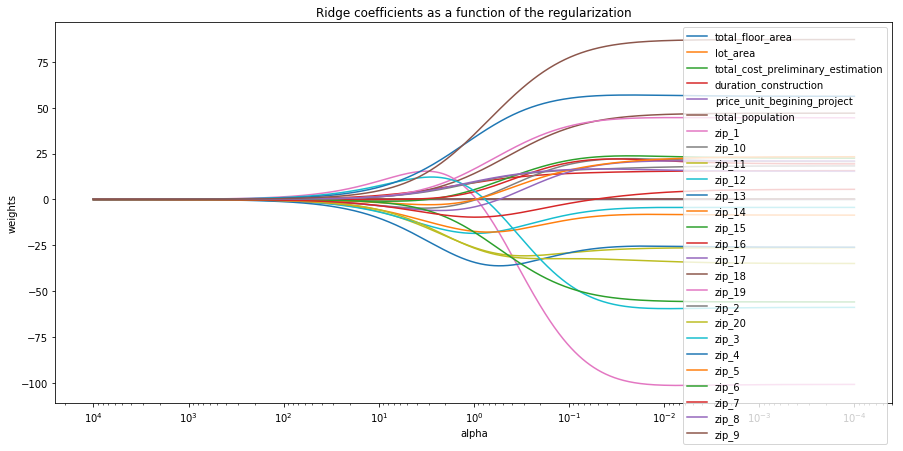

In [54]:
plt.figure(figsize=(15,7))
ax = plt.gca() # get current axis
plt.plot(alphas, np.squeeze(coefs))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(indep_vars)

¿Cuáles son las variables mas importantes?

Vamos ahora analizar los valores de r2 ajustado en los dataset de entrenamiento y test.

Creamos un array con los valores de las dos series uno a uno para poder plotearlos al mismo tiempo.

In [55]:
t1 = np.array(r2adj_train_vec)
t1 = t1[:, np.newaxis]
print("train: ", t1.shape)

t2 = np.array(r2adj_test_vec)
t2 = t2[:, np.newaxis]
print("test: ", t2.shape)

r2adj_vecs = np.concatenate((t1, t2), axis=1)
print("concatenación: ", r2adj_vecs.shape)

train:  (1000, 1)
test:  (1000, 1)
concatenación:  (1000, 2)


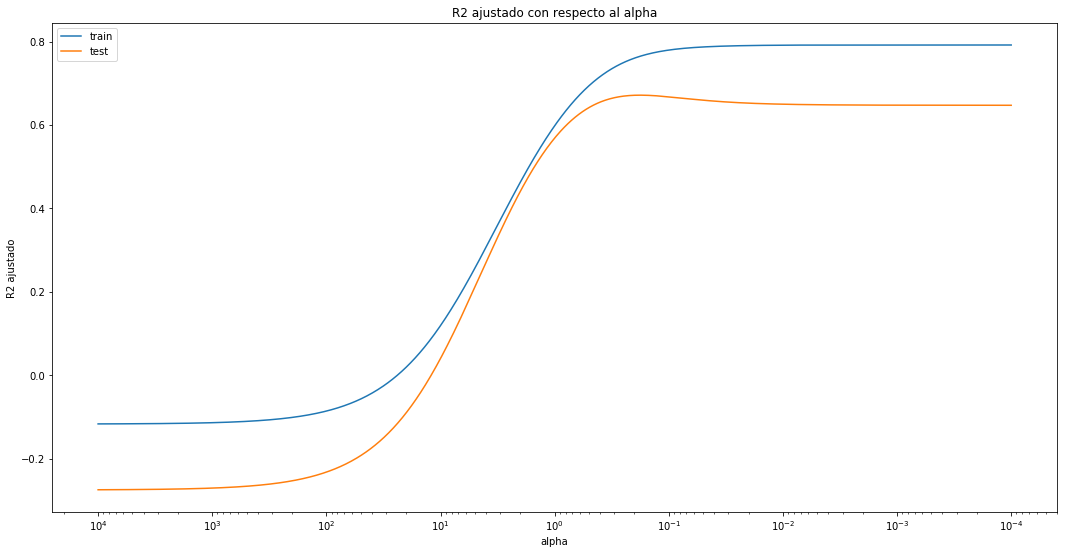

In [56]:
plt.figure(figsize=(18,9))
ax = plt.gca()
plt.plot(alphas, r2adj_vecs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('R2 ajustado')
plt.title('R2 ajustado con respecto al alpha')
plt.legend(['train', 'test'])

Encontramos que para un valor de alpha un poco por debajo de 0.2, se obtiene el valor máximal de R2 ajustado para el conjunto de test.
Vamos a utilizar CV para comparar valores de alpha cercanos. 

In [57]:
indiceMax = np.argmax(r2adj_test_vec)
r2Max = r2adj_test_vec[indiceMax]
alphaMax = alphas[indiceMax]
print("El nivel máximo de R2 es {}, y se alcanza con un alpha de {}".format(r2Max, alphaMax))

El nivel máximo de R2 es 0.6713999902490587, y se alcanza con un alpha de 0.1783410220710008


In [58]:
ridgereg = Ridge(alpha=alphaMax, normalize=True)
ridgereg.fit(train_X, train_y)

train_y_pred = ridgereg.predict(train_X)
test_y_pred = ridgereg.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 5367.8267
MSE (test) : 7270.9156
R2  (train): 0.7894
R2  (test) : 0.7414
R2 adj (train): 0.7647
R2 adj (test): 0.6714


## Lasso regression

Vamos ahora utilizar la regularización del modelo de Lasso. Utilizamos un valor de alpha específico (10).

In [59]:
lassoreg = Lasso(alpha=10.0, normalize=True)
lassoreg.fit(train_X, train_y)

train_y_pred = lassoreg.predict(train_X)
test_y_pred = lassoreg.predict(test_X)
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 25484.0986
MSE (test) : 28215.1039
R2  (train): 0.0000
R2  (test) : -0.0034
R2 adj (train): -0.1171
R2 adj (test): -0.2751


In [60]:
lassoreg.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.])

In [61]:
train_X.shape

(249, 26)